<a href="https://colab.research.google.com/github/DrumDong/Donggyu/blob/master/%EC%8B%A0%EB%8F%84%EB%A6%BC%EC%8A%A4%ED%84%B0%EB%94%94/%EC%8B%A0%EB%8F%84%EB%A6%BC%EC%8A%A4%ED%84%B0%EB%94%94_1%EC%A3%BC%EC%B0%A8.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Numpy

In [0]:
import numpy as np

## reshape
 - 지정된 사이즈로 변경이 불가능하면 오류 발생
 - reshape(-1,1)은 모든 차원의 array를 2차원으로 바꿔줌

In [0]:
array1 = np.arange(10)
array1

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9])

In [0]:
arr2 = array1.reshape(-1,6) # -1은 가변적으로 변화를 시키는 것

ValueError: ignored

인덱싱 중에서는 불린 인덱싱만 제대로 알고 있으면 될듯. 나머지는 2차원 array로 하는 것들이 많기 때문에 작업할 때만 할 줄 알면 될 듯함.

sort 할 때:
- axis =1 행변환
- axis =0 열변환

# Pandas

In [0]:
import pandas as pd

## titanic data를 활용한 Pandas 연습

In [0]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [0]:
import pandas as pd

titanic_df = pd.read_csv('/content/drive/My Drive/Colab Notebooks/data/titanic/train.csv')
titanic_df.head(3)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S


### pd.info
- 총 데이터 건수와 데이터 타입, Null 건수를 알 수 있음
 - 총 891개가 아닌 컬럼이 Null값이 있는 것

In [0]:
titanic_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


### pd.describe()
- 숫자형 칼럼에 대한 개략적인 데이터 분포도 확인 가능

In [0]:
titanic_df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


### 범주형 데이터 확인할때 요긴한 것: value_counts()
- 범주형 데이터의 분포가 어떻게 나타나 있는지 확인가능
- 그래프로도 표현 가능

In [0]:
titanic_df['Pclass'].value_counts() # Series 객체로 반환

3    491
1    216
2    184
Name: Pclass, dtype: int64

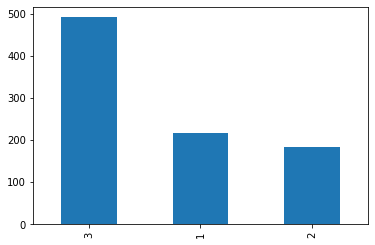

In [0]:
import matplotlib.pyplot as plt
titanic_df['Pclass'].value_counts().plot(kind='bar')

In [0]:
kk=titanic_df['Pclass'].value_counts().reset_index() # 새로운 인덱스를 생성하여 데이터프레임으로 변환
kk

,index,Pclass
0,3,491
1,1,216
2,2,184


Text(0, 0.5, 'frequency')

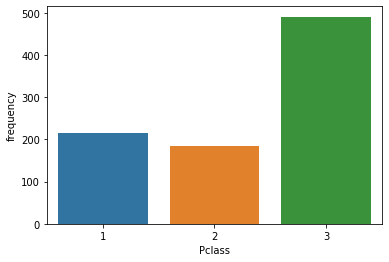

In [0]:
import seaborn as sns
sns.barplot(kk['index'],kk['Pclass'])
plt.xlabel('Pclass')
plt.ylabel('frequency')

## loc,iloc (전처리할 때 꼭 써먹는 것)
- ix[] : 연산자는 필요없으므로 무시하자
- iloc[] : 위치 기반 인덱싱만 허용, 인덱싱,슬라이싱을 모두 integer 형으로 입력
  - 위치인덱싱이 아닌 명칭으로 입력하면 오류 발생
- loc[]: 행과 열에 있는 숫자 및 이름(인덱스명,컬럼명)으로 접근하는 방식 
  - 명칭기반이기 떄문에 슬라이싱을 할 때 주의해야함(처음부터 끝까지 모두 포함해서 나옴)
  - 조건식으로 할때는 .loc[컬럼조건,보고싶은 컬럼] 으로 접근

In [0]:
titanic_df.iloc[0:2,:]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C


In [0]:
titanic_df.loc[0:2,['PassengerId','Survived']] # 슬라이싱 주의★

,PassengerId,Survived
0,1,0
1,2,1
2,3,1


In [0]:
#성별이 남자인 행의 Name컬럼과 Sex 컬럼을 출력하시오.
titanic_df.loc[titanic_df['Sex']=='male',['Name','Sex']]

,Name,Sex
0,"Braund, Mr. Owen Harris",male
4,"Allen, Mr. William Henry",male
5,"Moran, Mr. James",male
6,"McCarthy, Mr. Timothy J",male
7,"Palsson, Master. Gosta Leonard",male
...,...,...
883,"Banfield, Mr. Frederick James",male
884,"Sutehall, Mr. Henry Jr",male
886,"Montvila, Rev. Juozas",male
889,"Behr, Mr. Karl Howell",male


In [0]:
# Survived가 1인 사람들의 이름과 성별을 출력하시오
titanic_df.loc[titanic_df['Survived']==1,['Name','Sex']]

,Name,Sex
1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female
2,"Heikkinen, Miss. Laina",female
3,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female
8,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female
9,"Nasser, Mrs. Nicholas (Adele Achem)",female
...,...,...
875,"Najib, Miss. Adele Kiamie ""Jane""",female
879,"Potter, Mrs. Thomas Jr (Lily Alexenia Wilson)",female
880,"Shelley, Mrs. William (Imanita Parrish Hall)",female
887,"Graham, Miss. Margaret Edith",female


In [0]:
# Survived가 1인 사람들의 이름과 성별을 출력하시오 (불리언 인덱싱으로 출력)
titanic_df[titanic_df['Survived']==1][['Name','Sex']]=0
titanic_df

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
/usr/local/lib/python3.6/dist-packages/pandas/core/indexing.py:494: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[item] = s


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


불리언인덱싱으로는 값 할당이 안된다 이거 제대로 알고 가야함. 전처리를 할때는 loc[]를 쓰자.

## Groupby
- 그래프 만들 때 유용함 (경험상)
- 범주별로 데이터 분포 확인할때 요긴함

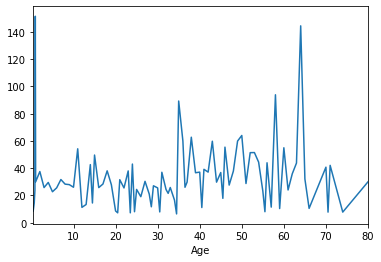

In [0]:
titanic_df.groupby('Age')['Fare'].mean().plot(kind='line') # 나이별 요금의 평균

In [0]:
titanic_df.groupby('Pclass')[['Age','Fare']].agg([max,min]) 

Age            Fare     
         max   min       max  min
Pclass                           
1       80.0  0.92  512.3292  0.0
2       70.0  0.67   73.5000  0.0
3       74.0  0.42   69.5500  0.0

단순한 연산은 어느정도 가능하나 복잡한 연산을 하는데에는 sql에 비해 복잡한 처리가 필요함
- max(Age),sum(SibSp),avg(Fare) from titanic_df group by Pclass

In [0]:
agg_format={'Age':'max','SibSp':'sum','Fare':'mean'}
titanic_df.groupby('Pclass').agg(agg_format)

,Age,SibSp,Fare
Pclass,,,
1,80.0,90,84.154687
2,70.0,74,20.662183
3,74.0,302,13.675550


## apply lambda
- map(lamda x : x**2,a) 기본 형태 ->  a를 인자로 받는다는 뜻
- DataFrame에서는 apply와 함께 사용 

In [0]:
titanic_df['Name_len']=titanic_df['Name'].apply(lambda x: len(x)) # 'Name'자체가 인자로 들어가기 때문에 뒤에 따로 쓸 필요가 없음
titanic_df[['Name','Name_len']].head()

,Name,Name_len
0,"Braund, Mr. Owen Harris",23
1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",51
2,"Heikkinen, Miss. Laina",22
3,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",44
4,"Allen, Mr. William Henry",24


In [0]:
#나이가 15세 미만이면 'Age'를 Child 아니면 'Adult'로 바꾸자
titanic_df['Child_Adult']=titanic_df['Age'].apply(lambda x: 'Chind' if x <=15 else 'Adult')
titanic_df[['Child_Adult','Age']]

,Child_Adult,Age
0,Adult,22.0
1,Adult,38.0
2,Adult,26.0
3,Adult,35.0
4,Adult,35.0
...,...,...
886,Adult,27.0
887,Adult,19.0
888,Adult,NaN
889,Adult,26.0


In [0]:
# loc 방식
titanic_df.loc[titanic_df['Age']<=15,'Child_Adult2'] = 'Chind'
titanic_df.loc[titanic_df['Age']>15,'Child_Adult2'] = 'Adult'
titanic_df[['Child_Adult2','Age']]

,Child_Adult2,Age
0,Adult,22.0
1,Adult,38.0
2,Adult,26.0
3,Adult,35.0
4,Adult,35.0
...,...,...
886,Adult,27.0
887,Adult,19.0
888,NaN,NaN
889,Adult,26.0
